<a href="https://colab.research.google.com/github/Madhumitharamu/madhumitha/blob/main/weatheranalysis_project1_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**load data**

In [10]:
data = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')

**Data types of the dataframe**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [12]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [13]:
data.shape

(96453, 11)

In [14]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [15]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

**Now change Data type of column df['Formatted Date']**

In [16]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc= True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

**dataframe columns**

**We only need 3 columns for our task which is data['Formatted Date','Apperent Temperature(c)','Humidity']**


**We need to find Avg Apparent temperature & Avg humidity of specific month from 2006 - 2016.**

In [17]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

**observation** : 
 here 'precip Type' as 517 missing values and rest columns have zero missing values.


In [18]:
# First we set Formatted Date as our index, because we need every year data of a specific month. 
data = data.set_index('Formatted Date')
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [19]:

# We need only 2 columns from our Dataset. so will fetched that columns only. 
cols = data[['Apparent Temperature (C)','Humidity']] 
data_avg = cols.resample('MS').mean()
# "MS" ==> Month starting 
# We are actually displaying the avg apparent temperature (C) and humidity using mean()
data_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


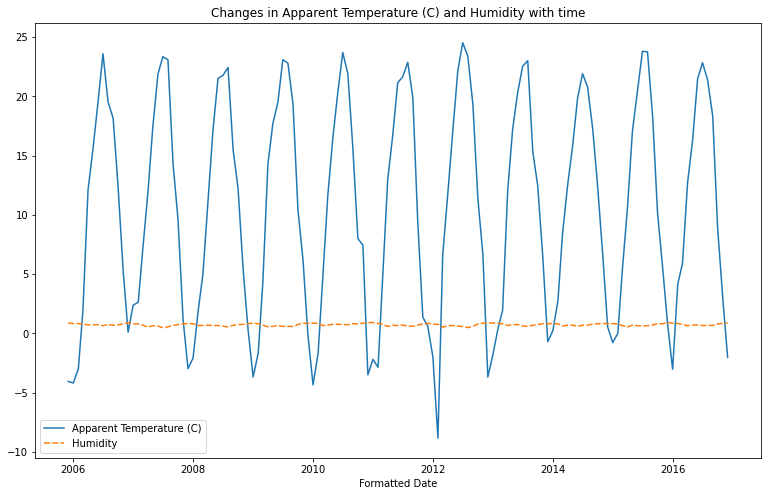

In [20]:
 #We will plot both value with respect to datetime i.e. index column to check variation in data. 
plt.figure(figsize=(13,8))
plt.title("Changes in Apparent Temperature (C) and Humidity with time")
sns.lineplot(data=data_avg);

**Conclusion:-**
For 10 years, Average Apparent Temperature change by month-month in that specific year only and remain same for every year.
No any change in Average humidity, i.e. straight line parallel to X-axis. That means for 10 years the humidity is approximately constant.

In [21]:
data = data_avg[data_avg.index.month==4]
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.782770,0.650222
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


In [24]:
import matplotlib.dates as dts

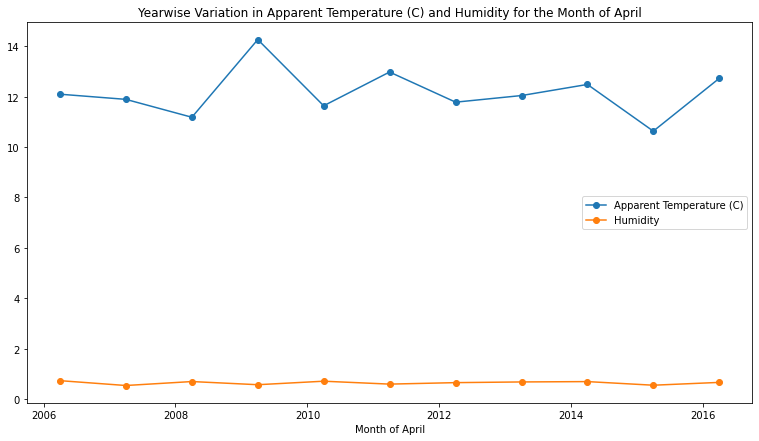

In [25]:
fig, st = plt.subplots(figsize = (13,7))
st.plot(data.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'],marker='o', linestyle='-',label='Apparent Temperature (C)');
st.plot(data.loc['2006-04-01':'2016-04-01', 'Humidity'],marker='o', linestyle='-',label='Humidity');
st.set_xlabel('Month of April')
st.legend(loc = 'center right')
plt.title("Yearwise Variation in Apparent Temperature (C) and Humidity for the Month of April");

Final Conclusion :
Average Apparent Temperature (c) increase for year 2008-09 and then again decrease from 2009-10 to its average level. Then slighlty increase for period 2010-11 and then drop again for year 2011-12. For year 2014-15 it decrease drastically and then come to average level for year 2015-16.
It observed, for year 2009 the Apparent Temperature is at Highest 14.26(C) and for year 2015 the Apparent Temperature is at lowest 10.63(C).
There is no any change in average Humidity for given year 2006-2016. The humidity graph line is approximately parallel to the X-axis.